# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [58]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [59]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvMoS2"
THSPC_DIR = "theta"

In [60]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [61]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")

Dataset shape: (101, 20, 1521, 3)
Number of modes: 20
Mesh shape: (101, 1521, 2)


In [19]:
phonons[75,0,23,:,2]

IndexError: index 23 is out of bounds for axis 2 with size 20

In [24]:
print(phonons[75,0,0] + phonons[75,1,0])

[[0.00417768 0.00299392 0.00466987]
 [0.00431909 0.00320081 0.00014615]
 [0.00425831 0.00296822 0.00264098]
 ...
 [0.00430074 0.00316059 0.00168608]
 [0.00428993 0.00334696 0.00051628]
 [0.00438411 0.00315329 0.00198183]]


In [28]:
# Identify the LB modes
LBs = [0]*ntheta
for i, tnsr in enumerate(phonons):
    tnsr = np.transpose(tnsr, axes=(1,0,2,3))
    LB_i = []
    for j, band in enumerate(tnsr):
        if np.all(band[0,:,2] > -1e-3) and np.mean(band[0,:,2]) > 1e-4 and np.all(band[1,:,2] < 1e-3):
            LB_i.append(j)
    print(f"[{round(thetas[i], 2)}] LB @ {LB_i}")
    LBs[i] = LB_i

[0.01] LB @ []
[0.11] LB @ [10, 11]
[0.21] LB @ [10, 11]
[0.31] LB @ [10, 11]
[0.41] LB @ []
[0.51] LB @ []
[0.61] LB @ []
[0.71] LB @ []
[0.81] LB @ [19]
[0.91] LB @ [19]
[1.01] LB @ []
[1.11] LB @ []
[1.21] LB @ []
[1.31] LB @ []
[1.41] LB @ []
[1.51] LB @ []
[1.61] LB @ []
[1.71] LB @ []
[1.81] LB @ []
[1.91] LB @ [17]
[2.01] LB @ [17]
[2.11] LB @ [17]
[2.21] LB @ [17]
[2.31] LB @ [17]
[2.41] LB @ [17]
[2.51] LB @ [17]
[2.61] LB @ [17]
[2.71] LB @ [17]
[2.81] LB @ [17]
[2.91] LB @ [17]
[3.01] LB @ [17]
[3.11] LB @ [17]
[3.21] LB @ [17]
[3.31] LB @ [17]
[3.41] LB @ [17]
[3.51] LB @ [11, 17]
[3.61] LB @ [11, 17]
[3.71] LB @ [11, 17]
[3.81] LB @ [11, 17]
[3.91] LB @ [11, 17]
[4.01] LB @ [11, 17]
[4.11] LB @ [11, 16, 17]
[4.21] LB @ [11, 16, 17]
[4.31] LB @ [11, 16, 17]
[4.41] LB @ [11]
[4.51] LB @ [11]
[4.61] LB @ [11]
[4.71] LB @ [11]
[4.81] LB @ [11]
[4.91] LB @ [11]
[5.0] LB @ [11]
[5.1] LB @ [11]
[5.2] LB @ [11]
[5.3] LB @ [11]
[5.4] LB @ [11]
[5.5] LB @ [11]
[5.6] LB @ [11]
[5.7] 

In [29]:
# Identify the S modes
for i, tnsr in enumerate(phonons):
    tnsr = np.transpose(tnsr, axes=(1,0,2,3))
    Ss = []
    for j, band in enumerate(tnsr):
        reverse = np.all(np.abs(band[0] + band[1]) < 1e-2)
        if reverse and (j not in LBs[i]):
            Ss.append(j)
    print(f"[{round(thetas[i], 2)}] S @ {Ss}")

[0.01] S @ []
[0.11] S @ []
[0.21] S @ []
[0.31] S @ []
[0.41] S @ []
[0.51] S @ []
[0.61] S @ [15]
[0.71] S @ [15, 16]
[0.81] S @ [15, 16]
[0.91] S @ []
[1.01] S @ [17]
[1.11] S @ [12, 17, 18, 19]
[1.21] S @ [12, 17, 18, 19]
[1.31] S @ [12, 17, 18, 19]
[1.41] S @ [12, 17, 18, 19]
[1.51] S @ [12, 17, 18, 19]
[1.61] S @ [12, 17, 18, 19]
[1.71] S @ [17, 18, 19]
[1.81] S @ [17, 18, 19]
[1.91] S @ [18, 19]
[2.01] S @ [18, 19]
[2.11] S @ [18, 19]
[2.21] S @ [18, 19]
[2.31] S @ [18, 19]
[2.41] S @ [18, 19]
[2.51] S @ [11, 18, 19]
[2.61] S @ [11, 18, 19]
[2.71] S @ [11, 18, 19]
[2.81] S @ [11, 18, 19]
[2.91] S @ [11, 18, 19]
[3.01] S @ [11, 18, 19]
[3.11] S @ [11, 18, 19]
[3.21] S @ [11, 18, 19]
[3.31] S @ [11, 18, 19]
[3.41] S @ [11, 18, 19]
[3.51] S @ [18, 19]
[3.61] S @ [18, 19]
[3.71] S @ [18, 19]
[3.81] S @ [18, 19]
[3.91] S @ [18, 19]
[4.01] S @ [18, 19]
[4.11] S @ [18, 19]
[4.21] S @ [18, 19]
[4.31] S @ [18, 19]
[4.41] S @ [18, 19]
[4.51] S @ [18, 19]
[4.61] S @ [18, 19]
[4.71] S @ [18

Analyzing theta = 1.009 (idx=10)


<Figure size 432x288 with 0 Axes>

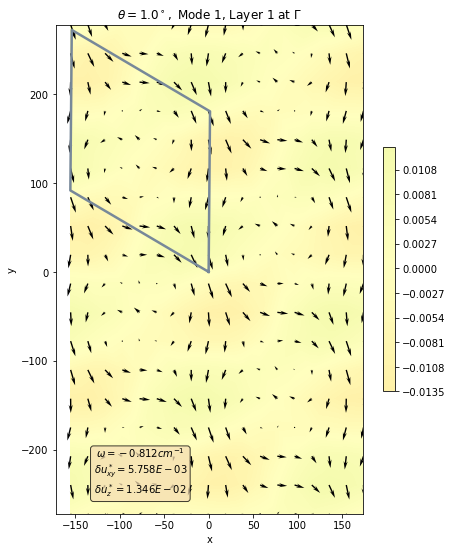

<Figure size 432x288 with 0 Axes>

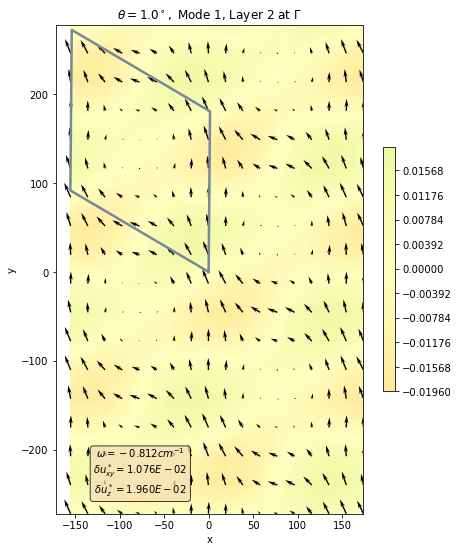

In [69]:
# Visualize the real-space phonons
THETA_IDX = 10
WHICH_MODE = 1
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], 6, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes))
ph.plot_a_phonon(WHICH_MODE)

In [6]:
max_uz = np.max(dataset[:,:,:,-1], axis=2) # maximum displacement magnitude in z-direction
mean_uz = np.mean(dataset[:,:,:,-1], axis=2) # same but average
print(f"max_uz shape: {max_uz.shape}")

max_uz shape: (101, 20)


<Figure size 432x288 with 0 Axes>

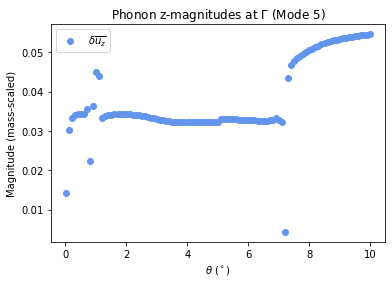

In [7]:
assert 0 <= WHICH_MODE < nmodes, "Invalid mode!"
plt.clf()
_, ax = plt.subplots()
ax.set_title(f"Phonon z-magnitudes at {log_name} (Mode {WHICH_MODE})")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (mass-scaled)')
# ax.scatter(thetas, max_uz[:,WHICH_MODE], color='black', label=r'$\delta u_z^*$')
ax.scatter(thetas, mean_uz[:,WHICH_MODE], color='cornflowerblue', label=r'$\delta \overline{u_z}$')
ax.legend()
plt.show()


In [7]:
max_uz[-1]

array([0.02190447, 0.05054771, 0.00251579, 0.01014128, 0.01069685,
       0.06370493, 0.0842767 , 0.00275623, 0.1044034 , 0.10967755,
       0.09705943, 0.00980545, 0.10265863, 0.07613856, 0.07613856,
       0.12241859, 0.00321292, 0.0090087 , 0.00638949, 0.00383773])